In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
import numpy as np
import itertools
from scipy import stats
plt.style.use('fivethirtyeight')

In [2]:
db = pd.read_csv('cluster-sleep.csv')

display(db)

,body_weight,brain_weight,max_life_span,gestation_time,predation_index,sleep_exposure_index,danger_index,total_sleep
0,6654.000,5712.0,38.6,645,3,5,3,3.3
1,1.000,6.6,4.5,42,3,1,3,8.3
2,3.385,44.5,14,60,1,1,1,12.5
3,0.920,5.7,?,25,5,2,3,16.5
4,2547.000,4603.0,69,624,3,5,4,3.9
...,...,...,...,...,...,...,...,...
57,2.000,12.3,7.5,200,3,1,3,5.4
58,0.104,2.5,2.3,46,3,2,2,15.8
59,4.190,58.0,24,210,4,3,4,10.3
60,3.500,3.9,3,14,2,1,1,19.4


In [20]:
df = db.dropna()  # Drop columns
X = df.iloc[:, :-1]

In [26]:

# Convert all columns to numeric, forcing non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Replace NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define a threshold to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Display the cleaned data
print(df_no_outliers)

    body_weight  brain_weight  max_life_span  gestation_time  predation_index  \
1         1.000          6.60       4.500000       42.000000                3   
2         3.385         44.50      14.000000       60.000000                1   
3         0.920          5.70      19.877586       25.000000                5   
5        10.550        179.50      27.000000      180.000000                4   
6         0.023          0.30      19.000000       35.000000                1   
8         3.300         25.60      28.000000       63.000000                1   
10        0.425          6.40       7.000000      112.000000                5   
12        0.550          2.40      19.877586      142.353448                2   
14        0.075          1.20       3.500000       42.000000                1   
15        3.000         25.00      50.000000       28.000000                2   
16        0.785          3.50       6.000000       42.000000                2   
17        0.200          5.0

<Axes: >

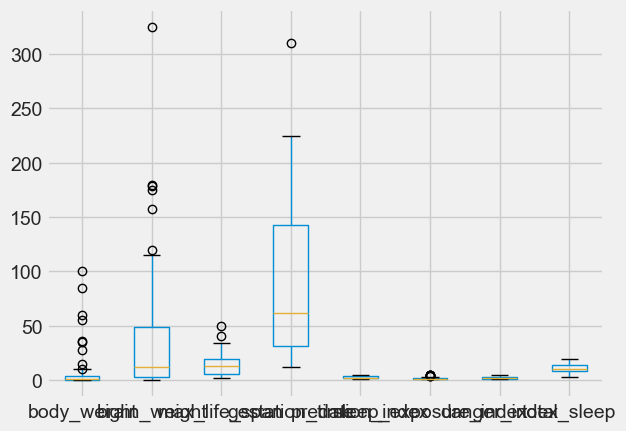

In [28]:
df_no_outliers.boxplot()

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

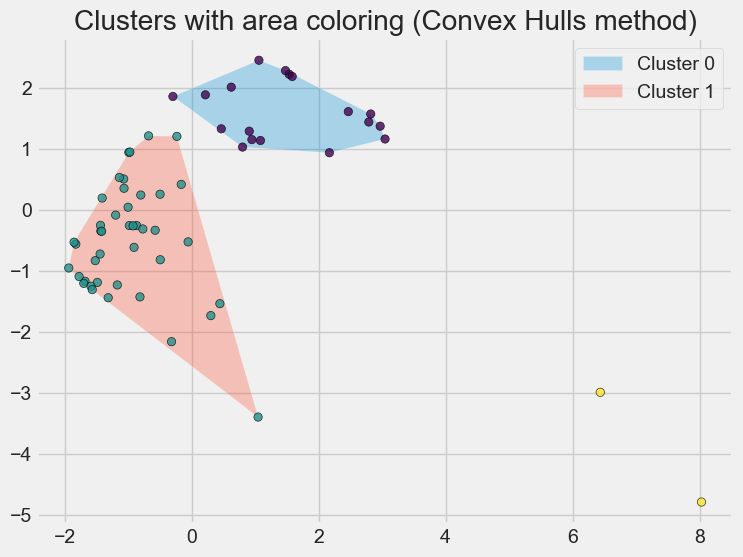

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))

for cluster_label in np.unique(df['Cluster']):
    cluster_points = X_pca[df['Cluster'] == cluster_label]
    
    if len(cluster_points) > 2:  # ConvexHull requires at least 3 points
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices]
        
        plt.fill(hull_points[:, 0], hull_points[:, 1], alpha=0.3, label=f'Cluster {cluster_label}')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', alpha=0.8)

plt.title('Clusters with area coloring (Convex Hulls method)')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()
